In [102]:
#NETWORK_CONFIG_LOCATION = '../scripts/runners/config/capsnet_mtlsmallnorb_weight_decoder_loss_deconv.yaml'
#MODEL_LOCATION_PREFIX = '/Users/jessica/Downloads/mtl/capsnet_mtlsmallnorb_weight_decoder_loss_deconv_1520984069/best_val_model-13'

#NETWORK_CONFIG_LOCATION = '../scripts/runners/config/capsnet_mtlsmallnorb_weight_decoder_loss.yaml'
#MODEL_LOCATION_PREFIX = '/Users/jessica/Downloads/mtl-2018-03-12/mtl/best_val_model-7'

# dense layers, more pixely
NETWORK_CONFIG_LOCATION = '../scripts/runners/config/cnn_mnist_reconstruction_dense.yaml'
MODEL_LOCATION_PREFIX = '/Users/jessica/scratch/results/cnn_mnist_reconstruction_dense/1521056538/checkpoints/best_val_model-2'

# CNN
NETWORK_CONFIG_LOCATION = '../scripts/runners/config/cnn_mnist_reconstruction.yaml'
MODEL_LOCATION_PREFIX = '/Users/jessica/scratch/results/cnn_mnist_reconstruction/1521057889/checkpoints/best_val_model-1'

# mtl
NETWORK_CONFIG_LOCATION = '../scripts/runners/config/old_mtl/capsnet_mtlsmallnorb_weight_decoder_loss_deconv.yaml'
MODEL_LOCATION_PREFIX = '/Users/jessica/Downloads/mtl/capsnet_mtlsmallnorb_weight_decoder_loss_deconv_1520984069/best_val_model-13'

NETWORK_CONFIG_LOCATION = '../scripts/runners/config/cnn_mtlsmallnorb.yaml'
MODEL_LOCATION_PREFIX = '/Users/jessica/scratch/results/cnn_mtlsmallnorb/1521069875/checkpoints/best_val_model-0'

NETWORK_CONFIG_LOCATION = '../scripts/runners/config/capsnet_mtlsmallnorb_reconstruction.yaml'
MODEL_LOCATION_PREFIX = '/Users/jessica/Downloads/mtl-2018-03-15/mtl/capsnet_mtlsmallnorb_reconstruction_1521072462/best_val_model-19'


# CNN decoder
NETWORK_CONFIG_LOCATION = '../scripts/runners/config/cnn_smallnorb_decoder_learning_rate_0_0001.yaml'
MODEL_LOCATION_PREFIX = '/Users/jessica/Downloads/mtl-2018-03-15b/mtl/cnn_smallnorb_decoder_learning_rate_0_0001__1521149890/best_val_model-13'

# 
NETWORK_CONFIG_LOCATION = '../scripts/runners/config/capsnet_smallnorb_weight_decoder_loss_high.yaml'
MODEL_LOCATION_PREFIX = '/Users/jessica/Downloads/mtl-2018-03-15b/mtl/capsnet_smallnorb_weight_decoder_loss_high__1520972368/best_val_model-13'


model_configs = [ 
    (
        'cnn_smallnorb_decoder_learning_rate_0_0001',
        '../scripts/runners/config/cnn_smallnorb_decoder_learning_rate_0_0001.yaml', 
        '/Users/jessica/Downloads/mtl-2018-03-15b/mtl/cnn_smallnorb_decoder_learning_rate_0_0001__1521149890/best_val_model-12'
    ),
    (
        'capsnet_smallnorb_weight_decoder_loss_high',
        '../scripts/runners/config/capsnet_smallnorb_weight_decoder_loss_high.yaml', 
         '/Users/jessica/Downloads/mtl-2018-03-15b/mtl/capsnet_smallnorb_weight_decoder_loss_high__1520972368/best_val_model-13'
    ),
    (
        'capsnet_smallnorb_leaky_relu_learning_rate_0_0001',
        '../scripts/runners/config/capsnet_smallnorb_leaky_relu_learning_rate_0_0001.yaml', 
        '/Users/jessica/Downloads/mtl-2018-03-15b/mtl/capsnet_smallnorb_leaky_relu_learning_rate_0_0001__1520370875/best_val_model-45'
    ),
    (
        'capsnet_mtlsmallnorb_regular_alpha',
        '../scripts/runners/config/capsnet_mtlsmallnorb_regular_alpha.yaml', 
        '/Users/jessica/Downloads/mtl-2018-03-16/mtl/capsnet_mtlsmallnorb_regular_alpha__1521158350/best_val_model-10'
    ),
    (
        'capsnet_mtlsmallnorb_dense_decoder',
        '../scripts/runners/config/capsnet_mtlsmallnorb_dense_decoder.yaml', 
        '/Users/jessica/Downloads/mtl-2018-03-16/mtl/capsnet_mtlsmallnorb_dense_decoder__1521157681/best_val_model-12'
    ),    
]

name, NETWORK_CONFIG_LOCATION, MODEL_LOCATION_PREFIX = model_configs[-1]

In [103]:
import sys

import tensorflow as tf
sys.path.append("../scripts/runners")

import run_from_config as run
from layer_models import slow_get_result_of_layer_id

In [104]:
tf.reset_default_graph()

args = run.parse_args(['--network-config', NETWORK_CONFIG_LOCATION, '--debug'])
network_config = run.parse_network_config(NETWORK_CONFIG_LOCATION, args)
lazy_batch_processor_pair = run.build_network(network_config)
variables = run.parameters_for_config_id(network_config)

Conv2DLayer(assert_output_shape=[40, 40, 256], id=None, input_id=None, filter_count=256, kernel_length=9, strides=1, padding=None, activation='leaky_relu') Tensor("build_losses_ops/losses_ops/features_0/capsnet_mtlsmallnorb_dense_decoder/augment_data/Merge:0", shape=(50, 48, 48, 1), dtype=float32, device=/device:CPU:0)
[50, 40, 40, 256]
PrimaryCapsule(assert_output_shape=[8192, 8], id=None, input_id=None, caps_count=32, caps_dim=8, kernel_length=9, strides=2, activation='leaky_relu') Tensor("build_losses_ops/losses_ops/features_0/capsnet_mtlsmallnorb_dense_decoder/layer_0__Conv2DLayer/conv2d/LeakyRelu/Maximum:0", shape=(50, 40, 40, 256), dtype=float32, device=/device:CPU:0)
[50, 8192, 8]
OutCapsule(assert_output_shape=[8192, 5, 16, 1], id=None, input_id=None, caps_count=5, caps_dim=16) Tensor("build_losses_ops/losses_ops/features_0/capsnet_mtlsmallnorb_dense_decoder/layer_1__PrimaryCapsule/caps_1_squash/mul:0", shape=(50, 8192, 8), dtype=float32, device=/device:CPU:0)
[50, 8192, 5, 16,

In [105]:
lazy_batch_processor = lazy_batch_processor_pair.train
features = lazy_batch_processor_pair.layer_features
input_placeholder_for_gpus = lazy_batch_processor_pair.input_placeholder_for_gpus
targets_placeholder_for_gpus = lazy_batch_processor_pair.targets_placeholder_for_gpus
is_training_placeholder = lazy_batch_processor_pair.is_training_placeholder

In [106]:
if 'mtl' in NETWORK_CONFIG_LOCATION:
    azimith_out_op = slow_get_result_of_layer_id(features, 'azimith_output')
decoder_out_op = slow_get_result_of_layer_id(features, 'decoder_output')
pred_out_op = features[network_config.prediction_layer_idx].ongoing_result
routing_out_op = slow_get_result_of_layer_id(features, 'caps_routing_out')

In [159]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, MODEL_LOCATION_PREFIX)
    input_batch_for_gpus, target_batches_for_gpus = next(lazy_batch_processor.data)
    
    if 'mtl' in NETWORK_CONFIG_LOCATION:
        azimith_out, pred_out, routing_out, decoder_out = sess.run(
            [azimith_out_op, pred_out_op, routing_out_op, decoder_out_op],
            {
                input_placeholder_for_gpus: input_batch_for_gpus,
                targets_placeholder_for_gpus: target_batches_for_gpus,
                is_training_placeholder: True
            }
        )
    elif 'capsnet' in NETWORK_CONFIG_LOCATION:
        pred_out, routing_out, decoder_out = sess.run(
            [pred_out_op, routing_out_op, decoder_out_op],
            {
                input_placeholder_for_gpus: input_batch_for_gpus,
                targets_placeholder_for_gpus: target_batches_for_gpus,
                is_training_placeholder: True
            }
        )
    else:
        pred_out, decoder_out = sess.run(
            [pred_out_op, decoder_out_op],
            {
                input_placeholder_for_gpus: input_batch_for_gpus,
                targets_placeholder_for_gpus: target_batches_for_gpus,
                is_training_placeholder: True
            }
        ) 

INFO:tensorflow:Restoring parameters from /Users/jessica/Downloads/mtl-2018-03-16/mtl/capsnet_mtlsmallnorb_dense_decoder__1521157681/best_val_model-12


# MTL-based model

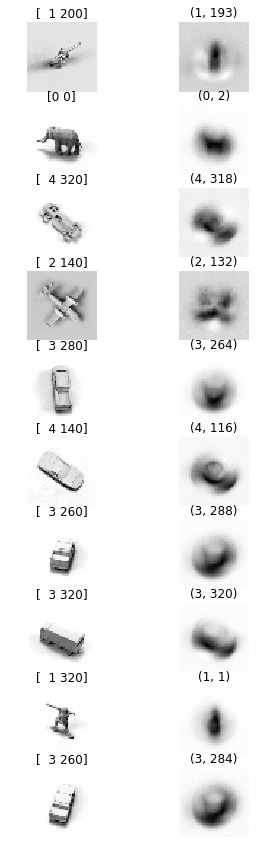

In [143]:
# plot the capsules

import matplotlib.pyplot as plt
import numpy as np


row_length = 2
ex_count = 10
fig, plts = plt.subplots(ex_count, row_length, figsize=(5, 15))
plts = plts.flatten()


for i, (pred, azi, dec, route, target, ins) in enumerate(
    zip(pred_out, azimith_out, decoder_out, routing_out, target_batches_for_gpus[0], input_batch_for_gpus[0])):
    
    if not i < ex_count:
        break   
    
    actual_class = target
    
    ax = plts[i * row_length]
    
    ax.set_title(actual_class)    
    ax.imshow(ins.reshape(48, 48), cmap='gray')
    ax.axis('off')
             
    
    ax = plts[i * row_length + 1]
    
    ax.set_title((pred, int(360 * azi[0])))
    ax.imshow(dec.reshape(48, 48), cmap='gray')
    ax.axis('off')
     
        
plt.show()

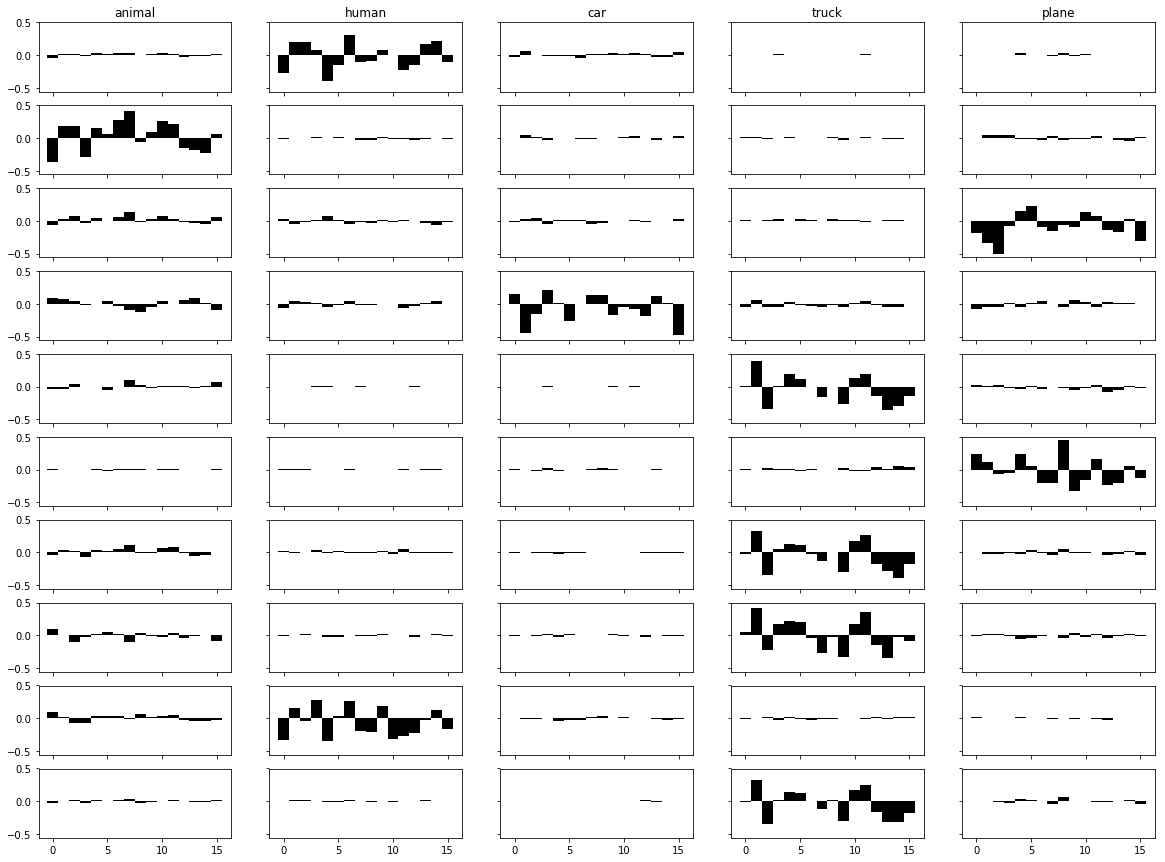

In [144]:
# plot the capsules

import matplotlib.pyplot as plt
import numpy as np


row_length = 5
ex_count = 10
fig, plts = plt.subplots(ex_count, row_length, figsize=(20, 15), sharey=True, sharex=True)
plts = plts.flatten()



for i, (pred, dec, route, target, ins) in enumerate(
    zip(pred_out, decoder_out, routing_out, target_batches_for_gpus[0], input_batch_for_gpus[0])):
    
    if not i < ex_count:
        break     
    
    actual_class = target
    
    shrunk_route = route[0, :, :, 0]
    for j, routing in enumerate(shrunk_route):
        ax = plts[i * row_length + j]
        for k, v in enumerate(routing):
            ax.bar(k, v, 1, color='k')

for j in range(len(shrunk_route)):
    ax = plts[j]
    ax.set_title(['animal', 'human', 'car', 'truck', 'plane'][j])            
            
plt.show()

# Modify routing output

In [163]:
input_batch_for_gpus, target_batches_for_gpus = next(lazy_batch_processor.data)

In [298]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, MODEL_LOCATION_PREFIX)
    
    orig_pred_out, orig_routing_out, orig_decoder_out, orig_azimith_out = sess.run(
        [pred_out_op, routing_out_op, decoder_out_op, azimith_out_op],
        {
            input_placeholder_for_gpus: input_batch_for_gpus,
            targets_placeholder_for_gpus: target_batches_for_gpus,
            is_training_placeholder: True
        }
    )


INFO:tensorflow:Restoring parameters from /Users/jessica/Downloads/mtl-2018-03-16/mtl/capsnet_mtlsmallnorb_dense_decoder__1521157681/best_val_model-12


In [309]:
ex_i = 6

small_in = np.tile(input_batch_for_gpus[0][ex_i], (1, 50, 1, 1, 1))
small_tar = np.tile(target_batches_for_gpus[0][ex_i], (1, 50, 1))

new_routing_out = np.tile(orig_routing_out[ex_i], (50, 1, 1, 1, 1))

with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, MODEL_LOCATION_PREFIX)
    
    for i in range(48):
        n = 3
        new_routing_out[i, :, :, i // n, :] += 0.2 * (i % n + 1)
    
    pred_out, routing_out, decoder_out, azimith_out = sess.run(
        [pred_out_op, routing_out_op, decoder_out_op, azimith_out_op],
        {
            input_placeholder_for_gpus: small_in,
            targets_placeholder_for_gpus: small_tar,
            is_training_placeholder: True,
            routing_out_op: new_routing_out,          
        }
    )    
    
print(pred_out)    

INFO:tensorflow:Restoring parameters from /Users/jessica/Downloads/mtl-2018-03-16/mtl/capsnet_mtlsmallnorb_dense_decoder__1521157681/best_val_model-12
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


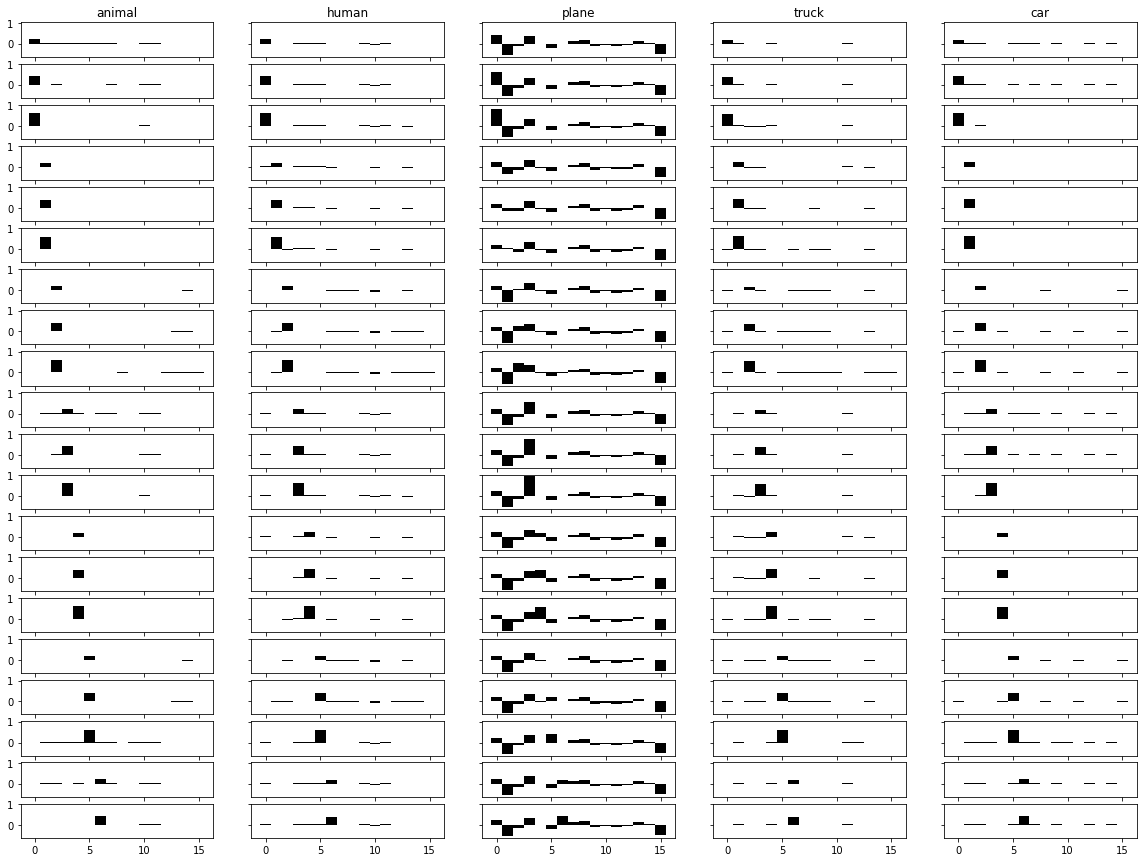

In [310]:
row_length = 5
ex_count = 20
fig, plts = plt.subplots(ex_count, row_length, figsize=(20, 15), sharey=True, sharex=True)
plts = plts.flatten()


for i in range(ex_count):
    print(i)
    route = new_routing_out[i]
    
    if not i < ex_count:
        break     
    
    shrunk_route = route[0, :, :, 0]
    for j, routing in enumerate(shrunk_route):
        ax = plts[i * row_length + j]
        for k, v in enumerate(routing):
            ax.bar(k, v, 1, color='k')

for j in range(len(shrunk_route)):
    ax = plts[j]
    ax.set_title(['animal', 'human', 'plane', 'truck', 'car'][j])            
            
plt.show()

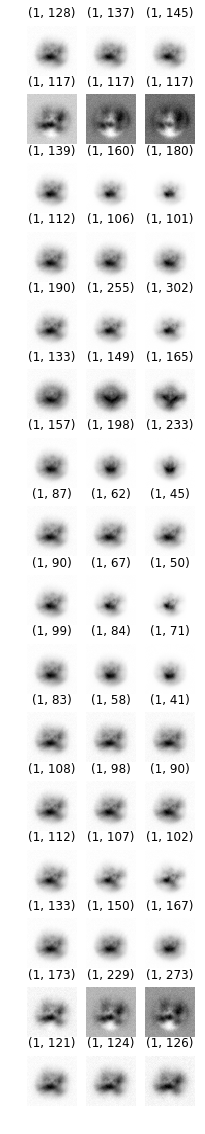

In [312]:
row_length = 3
ex_count = 16
fig, plts = plt.subplots(ex_count, row_length, figsize=(3, 20), sharey=True, sharex=True)
plts = plts.flatten()


    
for i in range(ex_count * row_length):    
    orig_pred = orig_pred_out[i]
    orig_dec = orig_decoder_out[i]
    orig_azi = orig_azimith_out[i]
    
    dec = decoder_out[i]    
    azi = azimith_out[i]
    route = routing_out[i]
    target = small_tar[0, i]
    ins = small_in[0, i]

    actual_class = target

    ax = plts[i]
    
    ax.set_title((pred, int(360 * azi[0])))
    ax.imshow(dec.reshape(48, 48), cmap='gray')
    ax.axis('off')
     
plt.show()    

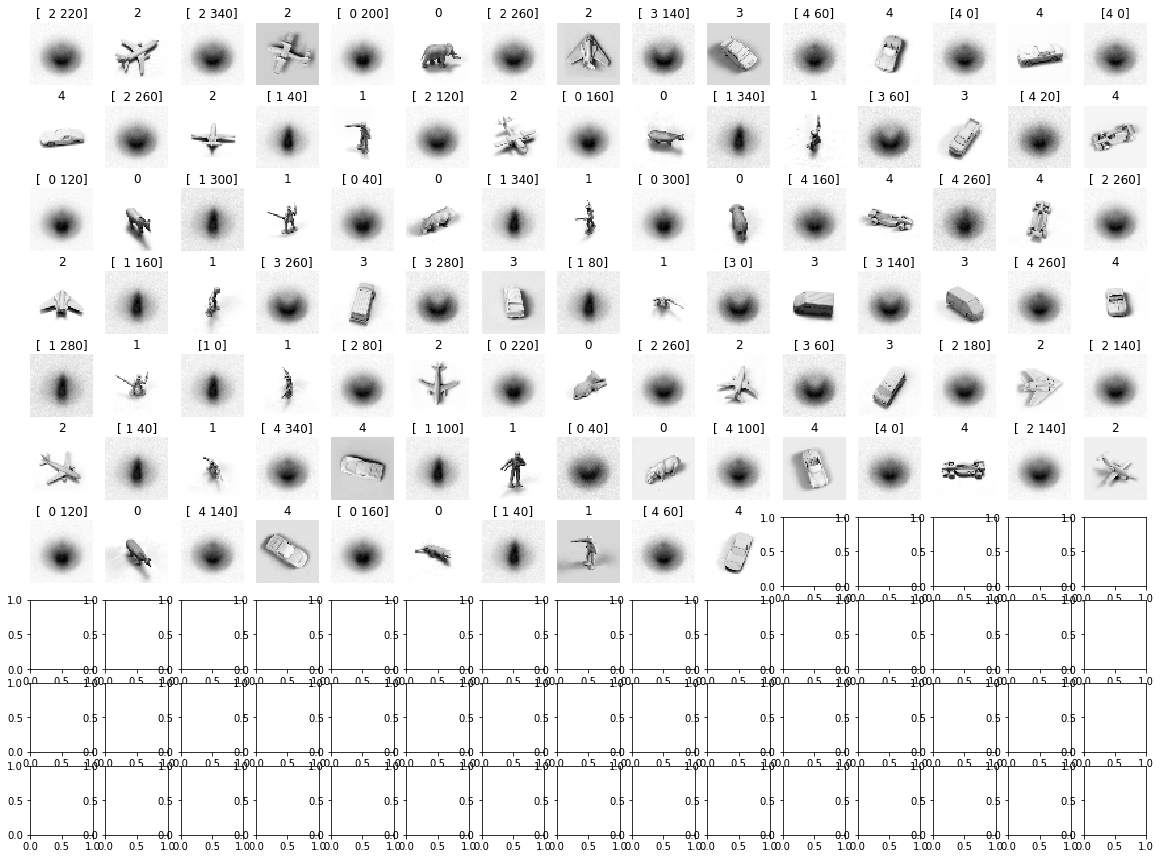

In [48]:
import matplotlib.pyplot as plt
import numpy as np

fig, plts = plt.subplots(15, 10, figsize=(20, 15))
plts = plts.flatten()

for i, (pred, dec, target, ins) in enumerate(
    zip(pred_out, decoder_out, target_batches_for_gpus[0], input_batch_for_gpus[0])):
    actual_class = target
    
    ax = plts[i * 2]
    
    ax.set_title(actual_class)
    ax.imshow(dec.reshape(48, 48), cmap='gray')
    ax.axis('off')

    ax = plts[i * 2 + 1]
    
    ax.set_title(pred)
    ax.imshow(ins.reshape(48, 48), cmap='gray')
    ax.axis('off')
     
        
plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, plts = plt.subplots(5, 10, figsize=(20, 15))
plts = plts.flatten()

for azi, pred, dec, ax, target, ins in zip(azimith_out, pred_out, decoder_out, plts, target_batches_for_gpus[0], input_batch_for_gpus[0]):
    actual_class = target[0]
    actual_azi = target[1]

    ax.set_title('\n'.join(map(str, [azi * 360, pred, actual_azi, actual_class])))
    ax.imshow(dec.reshape(48, 48), cmap='gray')
    ax.axis('off')
    
plt.show()

NameError: name 'azimith_out' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, plts = plt.subplots(5, 10, figsize=(20, 15))
plts = plts.flatten()

for azi, pred, dec, ax, target in zip(azimith_out, pred_out, decoder_out, plts, target_batches_for_gpus[0]):
    actual_class = target[0]
    actual_azimith = target[1]

    ax.set_title('\n'.join(map(str, [azi, pred, actual_class, actual_azimith])))
    ax.imshow(dec.reshape(48, 48), cmap='gray')
    ax.axis('off')

plt.show()

In [ ]:
ls ~/Downloads/mtl/capsnet_mtlsmallnorb_weight_decoder_loss_deconv_less_silly_1521036688